<h2 style ="color: black; background-color:yellow; font-family:Comic Sans MS;" align = "center">Salary Prediction Based On Years Of Work Experience</h2>

In [23]:
# Importing the libraries 
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [24]:
sal_df= pd.read_csv('Salary_Data.csv')
sal_df.head(4)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0


In [26]:
# Provides some information regarding the columns in the data
sal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [27]:
# this describes the basic stat behind the dataset used 
sal_df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 360x360 with 0 Axes>

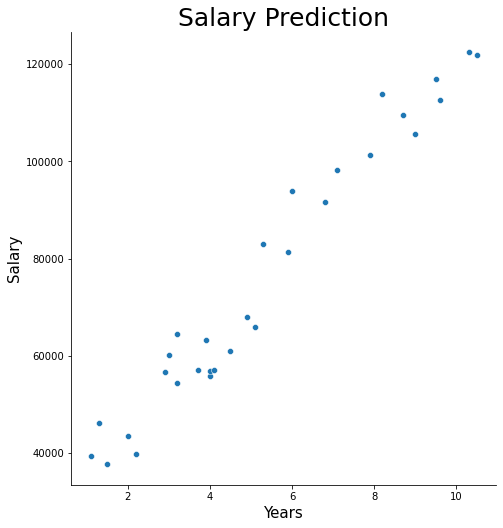

In [35]:
# These Plot helps us to better underatnd the relationship between salary and years of experince. 

plt.figure(figsize=(10,5))
sns.pairplot(sal_df,x_vars=['YearsExperience'],y_vars=['Salary'],size=7,kind='scatter')
plt.xlabel('Years', size = 15)
plt.ylabel('Salary', size = 15)
plt.title('Salary Prediction' , size = 25)
plt.show()

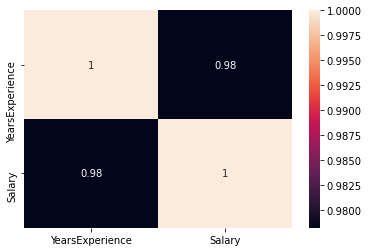

In [36]:
#corelation heatmap 
vlz=sns.heatmap(sal_df[['YearsExperience','Salary']].corr(),annot=True)

In [37]:
#identify the feature x and outcom y in varibale 

x=sm.add_constant(sal_df['YearsExperience'])
y=sal_df['Salary']
print(x.shape)
print(y.shape)
x


(30, 2)
(30,)


,const,YearsExperience
0,1.0,1.1
1,1.0,1.3
2,1.0,1.5
3,1.0,2.0
4,1.0,2.2
5,1.0,2.9
6,1.0,3.0
7,1.0,3.2
8,1.0,3.2
9,1.0,3.7


In [38]:
#train-test-split 
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(24, 2)
(6, 2)
(24,)
(6,)


In [39]:
salary_lm= sm.OLS(y_train, x_train).fit()

#from sklearn.linear_model import LinearRegression
#lm=LinearRegression(fit_intercept=True)
#salary_lm= lm.fit(x_train,y_train)


In [40]:
print(salary_lm.params)

const              25321.583012
YearsExperience     9423.815323
dtype: float64


In [41]:
#summary 
salary_lm.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                     Results: Ordinary least squares
=========================================================================
Model:                OLS                Adj. R-squared:       0.963     
Dependent Variable:   Salary             AIC:                  482.8721  
Date:                 2023-01-03 15:51   BIC:                  485.2282  
No. Observations:     24                 Log-Likelihood:       -239.44   
Df Model:             1                  F-statistic:          598.4     
Df Residuals:         22                 Prob (F-statistic):   1.91e-17  
R-squared:            0.965              Scale:                2.9566e+07
-------------------------------------------------------------------------
                  Coef.     Std.Err.    t    P>|t|    [0.025     0.975]  
-------------------------------------------------------------------------
const           25321.5830 2285.9377 11.0771 0.0000 20580.8383 30062.3277
YearsExperience  9423.8153  385.2332 24.4626 0.0000  8624.8906 10222.7400
-------------------------------------------------------------------------
Omnibus:                  0.647          Durbin-Watson:             2.026
Prob(Omnibus):            0.724          Jarque-Bera (JB):          0.697
Skew:                     0.323          Prob(JB):                  0.706
Kurtosis:                 2.472          Condition No.:             12   
=========================================================================

"""

In [42]:
y_pred_test=salary_lm.predict(x_test)
y_pred_train=salary_lm.predict(x_train)

In [43]:
#accuracy of the predicted values 
np.abs(r2_score(y_train,y_pred_train))

0.9645401573418148

In [44]:
np.abs(mean_squared_error(y_train,y_pred_train))

27102249.731261354

Text(0, 0.5, 'Predicted')

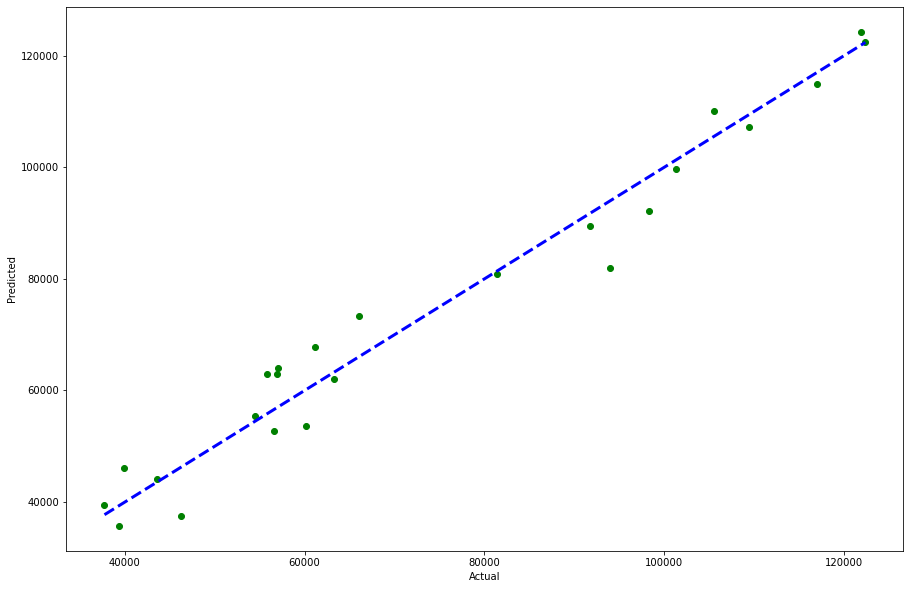

In [45]:
#scatter plot for train data 
plt.figure(figsize=(15,10))
plt.scatter(y_train,y_pred_train, c='green')
plt.plot([y_train.min(),y_train.max()], [y_train.min(), y_train.max()], 'k--', c='blue', lw=3 )
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [46]:
pred_y_df=pd.DataFrame({'YearsExperience': x_train['YearsExperience'], 'Actual_sal': y_train, 'pred_y': y_pred_train})
pred_y_df[0:20]

,YearsExperience,Actual_sal,pred_y
28,10.3,122391.0,122386.880839
24,8.7,109431.0,107308.776322
12,4.0,56957.0,63016.844304
0,1.1,39343.0,35687.779867
4,2.2,39891.0,46053.976722
16,5.1,66029.0,73383.041159
5,2.9,56642.0,52650.647449
13,4.1,57081.0,63959.225836
11,4.0,55794.0,63016.844304
22,7.9,101302.0,99769.724064



<h2 style ="color: black; background-color:yellow; font-family:Comic Sans MS;" align = "center">Boston House Pricing Dataset</h2>

In [47]:
#Loading and displaying the data set

from pandas import read_csv

column_names = ['crim' , 'zn' ,'indus', 'chas' , 'nox', 'rm', 'age' ,'dis', 'rad', 'tax', 'ptratio', 'black','lstat', 'medv' ]
data = read_csv('housing.csv', header=None,  delimiter=r"\s+", names=column_names)
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


**Crim:** Per capita crime rate by town

**Zn:** Proportion of residential land zoned for lots over 25,000 sq. ft.

**Indus: **Proportion of non-retail business acres per town

**Chas:** Charles River dummy variable (= 1 if tract bounds river; 0, otherwise)

**Nox:** Nitrogen oxides concentration (parts per 10 million)

**Rm:**Average number of rooms per dwelling

**Age:** Proportion of owner-occupied units built before 1940

**Dis:** Weighted mean of distances to five Boston employment centers

**Rad:** Index of accessibility to radial highways

**Tax:** Full-value property tax rate per $10,000

**Ptratio:** Pupil–Teacher ratio by town

**Black:** 1000(Bk – 0.63) ^2, where Bk is the proportion of Blacks by town

**Lstat:** Lower status of the population (percent)

**Medv:** Median value of owner-occupied homes in $1000s


<h3 style ="color: gray; font-family:Comic Sans MS;"> The Dataset Consist of 506 rows and 13 attributes with a target column.</h3>

In [8]:
data.shape

(506, 14)

In [48]:
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [9]:
#Considering independent and dependent variable
data_ = data.loc[:,['lstat', 'medv']]
data_.head(5)

,lstat,medv
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2


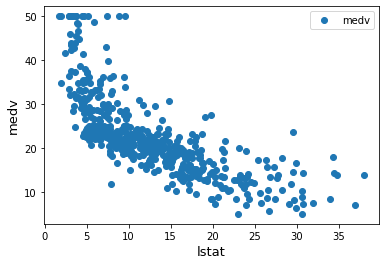

In [49]:
#plot the independent and dependent variables 
import matplotlib.pyplot as plt
data.plot(x='lstat', y='medv', style ='o')
plt.xlabel('lstat', size = 13)
plt.ylabel('medv', size = 13)
plt.show()

In [11]:
#dividing the independent and dependent varibale 
X=pd.DataFrame(data['lstat'])
y=pd.DataFrame(data['medv'])

In [13]:
#Split the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
#Shape of train and test
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(404, 1)
(102, 1)
(404, 1)
(102, 1)


In [15]:
#Linear Regression Algorithim
from sklearn.linear_model import LinearRegression

regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [16]:
#intercept point 
print(regressor.intercept_)

[34.83694982]


In [17]:
#slope
print(regressor.coef_)

[[-0.9665309]]


In [18]:
#Actual Values 
y_test

,medv
173,23.6
274,32.4
491,13.6
72,22.8
452,16.1
...,...
412,17.9
436,9.6
411,17.2
86,22.5


In [21]:
#predicted value 
y_pred=regressor.predict(X_test)
print(y_pred[:9])

[[26.09951047]
 [31.42509574]
 [17.37173642]
 [29.50169924]
 [18.14496114]
 [23.26757492]
 [17.12043839]
 [11.48556323]
 [22.39769711]]


In [22]:
from sklearn import metrics
import numpy as np

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error:  4.184807930623361
Mean Squared Error:  33.51954917268488
Root Mean Squared Error:  5.789606996393182
